In [1]:
import tensorflow as tf
import tensorflow_datasets as tfd
import tensorflow.keras as keras

from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

In [56]:
# Batch size
batch_size = 4

# Feature size
size = (224, 224)

# Feature normalization constants
mean, std = [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]

In [137]:
def decode_img(file_path):
    
    # create figure
    fig = plt.figure(figsize = (8, 8))
    
    # load the raw data from the file as a string
    img = tf.io.read_file(file_path)

    # convert the compressed string to a 3D uint8 tensor
    img = tf.image.decode_jpeg(img, channels = 3)
    
    # Use `convert_image_dtype` to convert to floats in the [0,1] range.
    img = tf.image.convert_image_dtype(img, tf.float32)
    
    fig.add_subplot(2, 2, 1)
    plt.imshow(img.numpy())
    
    # resize the image to the desired size.
    img = tf.image.resize(img, [224, 224])
    
    fig.add_subplot(2, 2, 2)
    plt.imshow(img.numpy())
    
def show_imgs(imgs, boxes = None):
    if len(imgs) == 1:
        imgs = tf.expand_dims(imgs, 0)
        
        if boxes is not None:
            boxes = tf.expand_dims(boxes, 0)
        
    # create figure
    fig = plt.figure(figsize = (8, 8))
        
    for index, img in enumerate(imgs):
        fig.add_subplot(2, 2, index + 1)
    
        if img.shape[-1] == 1:
            img = img[:, :, 0]

        if boxes is not None:
            box = boxes[index]
            
            scale_factor = img.shape[:2][::-1]
            bottom_left, width_height = box[:2] * scale_factor, (box[2:] - box[:2]) * scale_factor

            plt.gca().add_patch(Rectangle(bottom_left, *width_height, linewidth = 1, edgecolor = 'r', facecolor = 'none'))

        plt.imshow(img.numpy())

In [369]:
def normalize(input_image, input_mask):
    input_image = tf.cast(input_image, tf.float32) / 255.0
    input_mask -= 1
    
    return input_image, input_mask

def load_image(size, train = False):
    
    @tf.function
    def loader(sample):
        input_image = tf.image.resize(sample['image'], size)
        input_mask = tf.image.resize(sample['segmentation_mask'], size)

        if train and tf.random.uniform(()) > 0.5:
            input_image = tf.image.flip_left_right(input_image)
            input_mask = tf.image.flip_left_right(input_mask)

        input_image, input_mask = normalize(input_image, input_mask)

        return input_image, input_mask
    
    return loader

def create_dataset(size, dataset = 'oxford_iiit_pet', version = 0, verbose = False):
    
    if tfd.list_builders().index(dataset) == -1:
        return None
    
    # load dataset config
#     config = tfd.object_detection.Voc.BUILDER_CONFIGS[version]

    datasets, info = tfd.load(name = f"{dataset}:3.0.0", split = ['train', 'test'], with_info = True)
    if verbose:
        print(info)
        
#     padded_shapes = {
#         'image': [*size, 3],
#         'image/filename': [],
#         'labels': [None],
#         'labels_no_difficult': [None],
#         'objects': {
#             'bbox': [None, 4],
#             'is_difficult': [None],
#             'is_truncated': [None],
#             'label': [None],
#             'pose': [None]
#         }
#     }
    
    for index, dataset in enumerate(datasets):
        loader = load_image(size, index == 0)
        
        datasets[index] = dataset.shuffle(1024).map(loader).batch(batch_size).prefetch(buffer_size = tf.data.experimental.AUTOTUNE)
    
    return datasets

In [370]:
# create train/test set
datasets = create_dataset(size, version = 0, verbose = True)

tfds.core.DatasetInfo(
    name='oxford_iiit_pet',
    version=3.0.0,
    description='The Oxford-IIIT pet dataset is a 37 category pet image dataset with roughly 200
images for each class. The images have large variations in scale, pose and
lighting. All images have an associated ground truth annotation of breed.
',
    homepage='http://www.robots.ox.ac.uk/~vgg/data/pets/',
    features=FeaturesDict({
        'file_name': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=37),
        'segmentation_mask': Image(shape=(None, None, 1), dtype=tf.uint8),
    }),
    total_num_examples=7349,
    splits={
        'test': 3669,
        'train': 3680,
    },
    supervised_keys=('image', 'label'),
    citation="""@InProceedings{parkhi12a,
      author       = "Parkhi, O. M. and Vedaldi, A. and Zisserman, A. and Jawahar, C.~V.",
      title        = "Cats and Dogs",
      booktitle   

In [371]:
train_data, valid_data = datasets

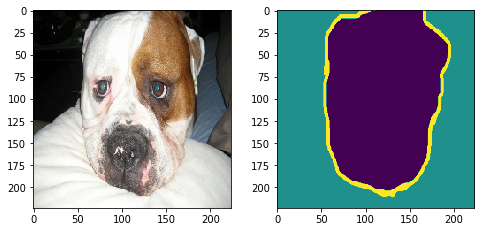

In [364]:
sample = next(iter(train_data))

# show sample
show_imgs([sample['input'][0], sample['target'][0]])

In [142]:
# Light base model
base_model = keras.applications.MobileNetV2(input_shape = [*size, 3], include_top = False)

9412608/9406464 [==============================] - ETA:  - ETA: 1: - ETA: 33s - ETA: 18 - ETA: 19 - ETA: 19 - ETA: 15 - ETA: 12 - ETA: 10 - ETA: 9 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 12s 1us/step


In [327]:
base_model.get_layer('block_13_expand_relu').output

<tf.Tensor 'block_13_expand_relu/Identity:0' shape=(None, 14, 14, 576) dtype=float32>

In [365]:
def create_model(size, verbose = False):
    
    # Encoder
    
    # Light base model
    base_model = keras.applications.MobileNetV2(input_shape = [*size, 3], include_top = False)

    # 112/96, 56/144, 28/192, 14/576, 7/960, 7/320
    layer_names = [
        'block_1_expand_relu',
        'block_3_expand_relu',
        'block_6_expand_relu',
        'block_12_expand_relu',
        'block_14_expand_relu',
        'block_16_project',
    ]

    layers = [ base_model.get_layer(name).output for name in layer_names ]
    
    # output pre-trained layers
    skip_layers = keras.Model(inputs = base_model.input, outputs = layers)
    
    # Decoder
    decoder = [
        keras.layers.Conv2DTranspose(960, 1, activation = 'relu'),
        keras.layers.Conv2DTranspose(576, 1, strides = (2, 2), activation = 'relu'),
        keras.layers.Conv2DTranspose(192, 1, strides = (2, 2), activation = 'relu'),
        keras.layers.Conv2DTranspose(144, 1, strides = (2, 2), activation = 'relu'),
        keras.layers.Conv2DTranspose(96, 1, strides = (2, 2), activation = 'relu')
    ]
    
    input_t = keras.layers.Input(shape = [*size, 3])
    
    # Encoder -> Decoder
    encodings = skip_layers(input_t)
    x = encodings[-1]
    for encoding, decode in zip(encodings[-2::-1], decoder):
        x = keras.layers.Concatenate()([decode(x), encoding])
    
    # Output layer -> 
    x = keras.layers.Conv2DTranspose(3, 3, strides = 2, padding = 'same', activation = 'softmax')(x)
    
    return keras.Model(inputs = input_t, outputs = x)

In [366]:
model = create_model(size)
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [373]:
EPOCHS = 20

model.fit(train_data, epochs = EPOCHS)

Epoch 1/20


    174/Unknown - 19s 19s/step - loss: 1.2682 - accuracy: 0.43 - 21s 11s/step - loss: 1.1856 - accuracy: 0.45 - 23s 8s/step - loss: 1.1478 - accuracy: 0.4689 - 25s 6s/step - loss: 1.1307 - accuracy: 0.468 - 27s 5s/step - loss: 1.1079 - accuracy: 0.474 - 29s 5s/step - loss: 1.0929 - accuracy: 0.488 - 31s 4s/step - loss: 1.1057 - accuracy: 0.472 - 33s 4s/step - loss: 1.1067 - accuracy: 0.466 - 34s 4s/step - loss: 1.0941 - accuracy: 0.471 - 36s 4s/step - loss: 1.0885 - accuracy: 0.473 - 38s 3s/step - loss: 1.0829 - accuracy: 0.481 - 40s 3s/step - loss: 1.0839 - accuracy: 0.483 - 42s 3s/step - loss: 1.0718 - accuracy: 0.491 - 43s 3s/step - loss: 1.0640 - accuracy: 0.498 - 45s 3s/step - loss: 1.0577 - accuracy: 0.504 - 47s 3s/step - loss: 1.0501 - accuracy: 0.509 - 49s 3s/step - loss: 1.0458 - accuracy: 0.512 - 51s 3s/step - loss: 1.0475 - accuracy: 0.510 - 52s 3s/step - loss: 1.0476 - accuracy: 0.511 - 54s 3s/step - loss: 1.0465 - accuracy: 0.510 - 56s 3s/step - loss: 1.0460 - accuracy: 0.

    348/Unknown - 345s 2s/step - loss: 0.9289 - accuracy: 0.56 - 346s 2s/step - loss: 0.9286 - accuracy: 0.56 - 348s 2s/step - loss: 0.9288 - accuracy: 0.56 - 350s 2s/step - loss: 0.9290 - accuracy: 0.56 - 352s 2s/step - loss: 0.9285 - accuracy: 0.56 - 354s 2s/step - loss: 0.9282 - accuracy: 0.56 - 356s 2s/step - loss: 0.9280 - accuracy: 0.56 - 358s 2s/step - loss: 0.9282 - accuracy: 0.56 - 359s 2s/step - loss: 0.9285 - accuracy: 0.56 - 361s 2s/step - loss: 0.9279 - accuracy: 0.56 - 363s 2s/step - loss: 0.9278 - accuracy: 0.56 - 365s 2s/step - loss: 0.9273 - accuracy: 0.56 - 367s 2s/step - loss: 0.9272 - accuracy: 0.56 - 369s 2s/step - loss: 0.9271 - accuracy: 0.56 - 371s 2s/step - loss: 0.9268 - accuracy: 0.56 - 373s 2s/step - loss: 0.9257 - accuracy: 0.56 - 374s 2s/step - loss: 0.9252 - accuracy: 0.56 - 376s 2s/step - loss: 0.9254 - accuracy: 0.56 - 378s 2s/step - loss: 0.9255 - accuracy: 0.56 - 380s 2s/step - loss: 0.9251 - accuracy: 0.56 - 382s 2s/step - loss: 0.9249 - accuracy: 0.

    522/Unknown - 672s 2s/step - loss: 0.8905 - accuracy: 0.58 - 674s 2s/step - loss: 0.8901 - accuracy: 0.58 - 676s 2s/step - loss: 0.8900 - accuracy: 0.58 - 678s 2s/step - loss: 0.8898 - accuracy: 0.58 - 680s 2s/step - loss: 0.8897 - accuracy: 0.58 - 681s 2s/step - loss: 0.8895 - accuracy: 0.58 - 683s 2s/step - loss: 0.8894 - accuracy: 0.58 - 685s 2s/step - loss: 0.8896 - accuracy: 0.58 - 687s 2s/step - loss: 0.8892 - accuracy: 0.58 - 689s 2s/step - loss: 0.8893 - accuracy: 0.58 - 691s 2s/step - loss: 0.8893 - accuracy: 0.58 - 693s 2s/step - loss: 0.8892 - accuracy: 0.58 - 695s 2s/step - loss: 0.8892 - accuracy: 0.58 - 697s 2s/step - loss: 0.8890 - accuracy: 0.58 - 699s 2s/step - loss: 0.8889 - accuracy: 0.58 - 700s 2s/step - loss: 0.8886 - accuracy: 0.58 - 702s 2s/step - loss: 0.8883 - accuracy: 0.58 - 704s 2s/step - loss: 0.8880 - accuracy: 0.58 - 706s 2s/step - loss: 0.8878 - accuracy: 0.58 - 708s 2s/step - loss: 0.8881 - accuracy: 0.58 - 710s 2s/step - loss: 0.8880 - accuracy: 0.

    689/Unknown - 1004s 2s/step - loss: 0.8745 - accuracy: 0.585 - 1006s 2s/step - loss: 0.8744 - accuracy: 0.585 - 1008s 2s/step - loss: 0.8744 - accuracy: 0.585 - 1009s 2s/step - loss: 0.8746 - accuracy: 0.584 - 1011s 2s/step - loss: 0.8745 - accuracy: 0.585 - 1013s 2s/step - loss: 0.8746 - accuracy: 0.584 - 1015s 2s/step - loss: 0.8743 - accuracy: 0.585 - 1017s 2s/step - loss: 0.8741 - accuracy: 0.585 - 1019s 2s/step - loss: 0.8743 - accuracy: 0.585 - 1021s 2s/step - loss: 0.8741 - accuracy: 0.585 - 1023s 2s/step - loss: 0.8740 - accuracy: 0.585 - 1025s 2s/step - loss: 0.8740 - accuracy: 0.585 - 1027s 2s/step - loss: 0.8738 - accuracy: 0.585 - 1028s 2s/step - loss: 0.8739 - accuracy: 0.585 - 1030s 2s/step - loss: 0.8737 - accuracy: 0.585 - 1032s 2s/step - loss: 0.8736 - accuracy: 0.585 - 1034s 2s/step - loss: 0.8736 - accuracy: 0.585 - 1036s 2s/step - loss: 0.8735 - accuracy: 0.585 - 1038s 2s/step - loss: 0.8733 - accuracy: 0.585 - 1040s 2s/step - loss: 0.8734 - accuracy: 0.585 - 10

    856/Unknown - 1337s 2s/step - loss: 0.8643 - accuracy: 0.588 - 1340s 2s/step - loss: 0.8642 - accuracy: 0.588 - 1342s 2s/step - loss: 0.8640 - accuracy: 0.589 - 1345s 2s/step - loss: 0.8638 - accuracy: 0.589 - 1348s 2s/step - loss: 0.8639 - accuracy: 0.589 - 1350s 2s/step - loss: 0.8639 - accuracy: 0.588 - 1352s 2s/step - loss: 0.8641 - accuracy: 0.588 - 1356s 2s/step - loss: 0.8640 - accuracy: 0.588 - 1358s 2s/step - loss: 0.8639 - accuracy: 0.588 - 1361s 2s/step - loss: 0.8640 - accuracy: 0.588 - 1363s 2s/step - loss: 0.8641 - accuracy: 0.588 - 1367s 2s/step - loss: 0.8639 - accuracy: 0.588 - 1369s 2s/step - loss: 0.8641 - accuracy: 0.588 - 1371s 2s/step - loss: 0.8640 - accuracy: 0.588 - 1373s 2s/step - loss: 0.8640 - accuracy: 0.588 - 1376s 2s/step - loss: 0.8641 - accuracy: 0.588 - 1379s 2s/step - loss: 0.8641 - accuracy: 0.588 - 1381s 2s/step - loss: 0.8639 - accuracy: 0.588 - 1384s 2s/step - loss: 0.8640 - accuracy: 0.588 - 1385s 2s/step - loss: 0.8641 - accuracy: 0.588 - 13

920/920 [==============================]0.8569 - accuracy: 0.591 - 1742s 2s/step - loss: 0.8568 - accuracy: 0.592 - 1743s 2s/step - loss: 0.8567 - accuracy: 0.592 - 1745s 2s/step - loss: 0.8568 - accuracy: 0.592 - 1747s 2s/step - loss: 0.8567 - accuracy: 0.592 - 1748s 2s/step - loss: 0.8566 - accuracy: 0.592 - 1750s 2s/step - loss: 0.8566 - accuracy: 0.592 - 1753s 2s/step - loss: 0.8566 - accuracy: 0.592 - 1755s 2s/step - loss: 0.8566 - accuracy: 0.592 - 1757s 2s/step - loss: 0.8565 - accuracy: 0.592 - 1760s 2s/step - loss: 0.8565 - accuracy: 0.592 - 1762s 2s/step - loss: 0.8565 - accuracy: 0.592 - 1765s 2s/step - loss: 0.8565 - accuracy: 0.592 - 1767s 2s/step - loss: 0.8564 - accuracy: 0.592 - 1769s 2s/step - loss: 0.8564 - accuracy: 0.592 - 1771s 2s/step - loss: 0.8562 - accuracy: 0.592 - 1774s 2s/step - loss: 0.8562 - accuracy: 0.592 - 1777s 2s/step - loss: 0.8563 - accuracy: 0.592 - 1779s 2s/step - loss: 0.8562 - accuracy: 0.592 - 1781s 2s/step - loss: 0.8561 - accuracy: 0.592 - 17

178/920 [====>.........................] - ETA: 1:31:52 - loss: 0.9091 - accuracy: 0.535 - ETA: 1:07:00 - loss: 0.8506 - accuracy: 0.584 - ETA: 58:30 - loss: 0.8886 - accuracy: 0.5509  - ETA: 54:01 - loss: 0.8610 - accuracy: 0.577 - ETA: 48:46 - loss: 0.8471 - accuracy: 0.594 - ETA: 45:26 - loss: 0.8134 - accuracy: 0.617 - ETA: 42:54 - loss: 0.8100 - accuracy: 0.614 - ETA: 40:59 - loss: 0.8166 - accuracy: 0.610 - ETA: 39:40 - loss: 0.8118 - accuracy: 0.613 - ETA: 38:25 - loss: 0.8159 - accuracy: 0.611 - ETA: 37:21 - loss: 0.8310 - accuracy: 0.597 - ETA: 36:32 - loss: 0.8367 - accuracy: 0.593 - ETA: 35:52 - loss: 0.8343 - accuracy: 0.596 - ETA: 35:43 - loss: 0.8397 - accuracy: 0.591 - ETA: 36:12 - loss: 0.8405 - accuracy: 0.589 - ETA: 36:45 - loss: 0.8375 - accuracy: 0.593 - ETA: 36:49 - loss: 0.8345 - accuracy: 0.595 - ETA: 37:16 - loss: 0.8271 - accuracy: 0.600 - ETA: 37:52 - loss: 0.8288 - accuracy: 0.599 - ETA: 38:52 - loss: 0.8218 - accuracy: 0.604 - ETA: 39:22 - loss: 0.8143 - acc

356/920 [==========>...................] - ETA: 32:39 - loss: 0.8146 - accuracy: 0.613 - ETA: 32:35 - loss: 0.8146 - accuracy: 0.613 - ETA: 32:31 - loss: 0.8141 - accuracy: 0.614 - ETA: 32:25 - loss: 0.8140 - accuracy: 0.614 - ETA: 32:20 - loss: 0.8141 - accuracy: 0.613 - ETA: 32:16 - loss: 0.8142 - accuracy: 0.613 - ETA: 32:11 - loss: 0.8143 - accuracy: 0.613 - ETA: 32:06 - loss: 0.8140 - accuracy: 0.614 - ETA: 32:04 - loss: 0.8140 - accuracy: 0.614 - ETA: 32:00 - loss: 0.8136 - accuracy: 0.614 - ETA: 31:56 - loss: 0.8127 - accuracy: 0.615 - ETA: 31:52 - loss: 0.8137 - accuracy: 0.614 - ETA: 31:47 - loss: 0.8130 - accuracy: 0.614 - ETA: 31:42 - loss: 0.8128 - accuracy: 0.615 - ETA: 31:38 - loss: 0.8128 - accuracy: 0.615 - ETA: 31:32 - loss: 0.8133 - accuracy: 0.614 - ETA: 31:27 - loss: 0.8127 - accuracy: 0.615 - ETA: 31:24 - loss: 0.8116 - accuracy: 0.615 - ETA: 31:20 - loss: 0.8114 - accuracy: 0.616 - ETA: 31:16 - loss: 0.8118 - accuracy: 0.615 - ETA: 31:13 - loss: 0.8118 - accuracy:

534/920 [================>.............] - ETA: 26:18 - loss: 0.8071 - accuracy: 0.618 - ETA: 26:17 - loss: 0.8070 - accuracy: 0.619 - ETA: 26:14 - loss: 0.8071 - accuracy: 0.618 - ETA: 26:11 - loss: 0.8068 - accuracy: 0.619 - ETA: 26:09 - loss: 0.8067 - accuracy: 0.619 - ETA: 26:05 - loss: 0.8068 - accuracy: 0.619 - ETA: 26:00 - loss: 0.8068 - accuracy: 0.619 - ETA: 25:56 - loss: 0.8064 - accuracy: 0.619 - ETA: 25:52 - loss: 0.8061 - accuracy: 0.619 - ETA: 25:48 - loss: 0.8065 - accuracy: 0.619 - ETA: 25:44 - loss: 0.8064 - accuracy: 0.619 - ETA: 25:40 - loss: 0.8065 - accuracy: 0.619 - ETA: 25:36 - loss: 0.8064 - accuracy: 0.619 - ETA: 25:32 - loss: 0.8062 - accuracy: 0.619 - ETA: 25:28 - loss: 0.8060 - accuracy: 0.619 - ETA: 25:25 - loss: 0.8063 - accuracy: 0.619 - ETA: 25:21 - loss: 0.8062 - accuracy: 0.619 - ETA: 25:17 - loss: 0.8064 - accuracy: 0.619 - ETA: 25:13 - loss: 0.8064 - accuracy: 0.619 - ETA: 25:10 - loss: 0.8059 - accuracy: 0.619 - ETA: 25:06 - loss: 0.8057 - accuracy:

633/920 [===================>..........] - ETA: 17:42 - loss: 0.8051 - accuracy: 0.620 - ETA: 17:39 - loss: 0.8051 - accuracy: 0.620 - ETA: 17:36 - loss: 0.8053 - accuracy: 0.620 - ETA: 17:33 - loss: 0.8052 - accuracy: 0.620 - ETA: 17:30 - loss: 0.8052 - accuracy: 0.620 - ETA: 17:27 - loss: 0.8049 - accuracy: 0.620 - ETA: 17:24 - loss: 0.8049 - accuracy: 0.620 - ETA: 17:22 - loss: 0.8048 - accuracy: 0.620 - ETA: 17:20 - loss: 0.8050 - accuracy: 0.620 - ETA: 17:18 - loss: 0.8049 - accuracy: 0.620 - ETA: 17:15 - loss: 0.8053 - accuracy: 0.620 - ETA: 17:12 - loss: 0.8053 - accuracy: 0.620 - ETA: 17:09 - loss: 0.8052 - accuracy: 0.620 - ETA: 17:06 - loss: 0.8051 - accuracy: 0.620 - ETA: 17:02 - loss: 0.8050 - accuracy: 0.620 - ETA: 16:59 - loss: 0.8047 - accuracy: 0.620 - ETA: 16:57 - loss: 0.8047 - accuracy: 0.620 - ETA: 16:54 - loss: 0.8046 - accuracy: 0.620 - ETA: 16:51 - loss: 0.8048 - accuracy: 0.620 - ETA: 16:48 - loss: 0.8049 - accuracy: 0.620 - ETA: 16:46 - loss: 0.8048 - accuracy:

KeyboardInterrupt: 